---

## 필수 라이브러리 설치 및 한글 폰트 설정

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import platform
import numpy as np
import matplotlib as mpl
from pathlib import Path
from IPython.display import display as dp
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
import urllib.request

In [32]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
import urllib.request

def change_matplotlib_font(font_url):
    FONT_DIR = "MY_FONT"
    FONT_PATH = os.path.join(FONT_DIR, "NanumGothic.ttf")

    # 1. 폰트 다운로드
    os.makedirs(FONT_DIR, exist_ok=True)
    urllib.request.urlretrieve(font_url, FONT_PATH)

    # 2. matplotlib fontManager에 추가
    fm.fontManager.addfont(FONT_PATH)

    # 3. font 이름 추출
    font_name = fm.FontProperties(fname=FONT_PATH).get_name()

    # 4. 전역 설정 반영
    matplotlib.rc('font', family=font_name)
    plt.rcParams['axes.unicode_minus'] = False

# ---- 실행 ----
change_matplotlib_font("https://raw.githubusercontent.com/fonts-archive/NanumGothic/main/NanumGothic.ttf")

---

## 1. 데이터 불러오기 및 기본 정보 확인

#### 1-1. 데이터 불러오기

In [33]:
# CSV 파일 URL
url = "https://raw.githubusercontent.com/JyoARa/Machine-Learning/refs/heads/main/Project/Titanic/train.csv"

# 불러오기
df = pd.read_csv(url)

# 처음 5행 확인
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
# 원본 복사
df_kor = df.copy()

In [35]:
# 컬럼명 한글화

# 컬럼명 매핑 (영어 → 한글)
columns_map = {
    "PassengerId": "승객ID",
    "Survived": "생존여부",
    "Pclass": "객실등급",
    "Name": "이름",
    "Sex": "성별",
    "Age": "나이",
    "SibSp": "형제/배우자수",
    "Parch": "부모/자녀수",
    "Ticket": "티켓번호",
    "Fare": "요금",
    "Cabin": "객실번호",
    "Embarked": "승선항구"
}

# rename으로 변경
df_kor.rename(columns=columns_map, inplace=True)

# 확인
df_kor.head()

,승객ID,생존여부,객실등급,이름,성별,나이,형제/배우자수,부모/자녀수,티켓번호,요금,객실번호,승선항구
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---

#### 1-2. 데이터 구조 확인

In [36]:
print("- shape :", df_kor.shape)                 

- shape : (891, 12)


In [37]:
df_kor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   승객ID     891 non-null    int64  
 1   생존여부     891 non-null    int64  
 2   객실등급     891 non-null    int64  
 3   이름       891 non-null    object 
 4   성별       891 non-null    object 
 5   나이       714 non-null    float64
 6   형제/배우자수  891 non-null    int64  
 7   부모/자녀수   891 non-null    int64  
 8   티켓번호     891 non-null    object 
 9   요금       891 non-null    float64
 10  객실번호     204 non-null    object 
 11  승선항구     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


---

#### 1-3. 데이터 요약 통계 확인


In [38]:
print("[수치형 통계 요약]")
dp(df_kor.describe())

print("[범주형 통계 요약]")
dp(df_kor.describe(include='object'))

[수치형 통계 요약]


,승객ID,생존여부,객실등급,나이,형제/배우자수,부모/자녀수,요금
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


[범주형 통계 요약]


,이름,성별,티켓번호,객실번호,승선항구
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


(참고) 아래 코드는 도메인 지식을 반영하여, 분석에 영향을 미치지 않는 의미 없는 컬럼(승객ID, 이름)은 제외하고, 실제로는 범주형 의미를 갖는 컬럼(생존여부, 객실등급)을 수치형이 아닌 범주형으로 조정한 뒤 요약 통계를 확인한 결과이다.

In [39]:
# 수치형 / 범주형 변수 자동 분류
num_cols = df_kor.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_kor.select_dtypes(exclude=[np.number]).columns.tolist()

# 제외할 컬럼 (분석에 사용하지 않음)
exclude_cols = ["승객ID"]

# 수치형 → 범주형으로 옮길 컬럼
num_to_cat = ["생존여부", "객실등급"]

# 제외 컬럼 제거
num_cols = [c for c in num_cols if c not in exclude_cols + num_to_cat]
cat_cols = [c for c in cat_cols if c not in exclude_cols]

# 수치형에서 옮겨온 컬럼을 범주형에 추가
cat_cols = list(set(cat_cols + num_to_cat))


In [40]:
print("[실제 수치형 통계 요약]")
dp(df_kor[num_cols].describe())

print("[실제 범주형 통계 요약]")
dp(df_kor[cat_cols].astype("object").describe())

[실제 수치형 통계 요약]


,나이,형제/배우자수,부모/자녀수,요금
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


[실제 범주형 통계 요약]


,성별,승선항구,객실번호,티켓번호,생존여부,이름,객실등급
count,891,889,204,891,891,891,891
unique,2,3,147,681,2,891,3
top,male,S,G6,347082,0,"Braund, Mr. Owen Harris",3
freq,577,644,4,7,549,1,491


---

## 2. 데이터 이해

#### 2-1. 컬럼별 의미 설명

In [41]:
print("columns :", df_kor.columns.tolist())    # 데이터프레임의 전체 컬럼 이름을 리스트로 출력

columns : ['승객ID', '생존여부', '객실등급', '이름', '성별', '나이', '형제/배우자수', '부모/자녀수', '티켓번호', '요금', '객실번호', '승선항구']


| 원본 영문 컬럼명      | 한글 컬럼명      | 설명                                                           | 데이터 타입(dtype) | 구분(수치형/범주형) |
| --------------- | ----------- | ------------------------------------------------------------ | ------------- | ----------- |
| **PassengerId** | **승객ID**    | 승객 고유 ID (단순 번호, 분석에는 크게 의미 없음)                              | int64         | 수치형(식별자)    |
| **Survived**    | **생존여부**    | 생존 여부 (타깃 변수) → `0 = 사망`, `1 = 생존`                           | int64         | **범주형**     |
| **Pclass**      | **객실등급**    | 선실 등급 (사회적/경제적 지위 지표) → `1 = 1등석`, `2 = 2등석`, `3 = 3등석`      | int64         | **범주형**     |
| **Name**        | **이름**      | 승객 이름 (이름, 성, 호칭(title) 포함. Feature Engineering에서 활용 가능)     | object        | 범주형         |
| **Sex**         | **성별**      | 성별 (`male`, `female`)                                        | object        | 범주형         |
| **Age**         | **나이**      | 나이 (일부 결측치 존재)                                               | float64       | 수치형         |
| **SibSp**       | **형제/배우자수** | 함께 탑승한 형제/자매(sibling) + 배우자(spouse) 수                        | int64         | 수치형         |
| **Parch**       | **부모/자녀수**  | 함께 탑승한 부모(parent) + 자녀(children) 수                           | int64         | 수치형         |
| **Ticket**      | **티켓번호**    | 티켓 번호 (패턴 추출 가능하나 일반적으로는 크게 사용하지 않음)                         | object        | 범주형         |
| **Fare**        | **요금**      | 운임 요금 (탑승 등급/선실 위치와 관련)                                      | float64       | 수치형         |
| **Cabin**       | **객실번호**    | 선실 번호 (결측치 많음. 선실의 앞 글자 = 구역 정보로 활용 가능)                      | object        | 범주형         |
| **Embarked**    | **승선항구**    | 탑승 항구 → `C = Cherbourg`, `Q = Queenstown`, `S = Southampton` | object        | 범주형         |


---
#### 2-2 결측치 확인

In [42]:
# 각 컬럼별 결측치 개수 계산
missing_count = df_kor.isnull().sum()

# 전체 대비 결측치 비율 계산
missing_ratio = (missing_count / len(df_kor)) * 100

# 결측치 현황을 DataFrame으로 정리
missing_df = pd.DataFrame({
    "결측치 개수": missing_count,
    "결측치 비율(%)": missing_ratio.round(2)
})

# 결측치 많은 순으로 정렬
missing_df = missing_df.sort_values(by="결측치 개수", ascending=False)

# 표로 출력
dp(missing_df)

,결측치 개수,결측치 비율(%)
객실번호,687,77.10
나이,177,19.87
승선항구,2,0.22
승객ID,0,0.00
이름,0,0.00
객실등급,0,0.00
생존여부,0,0.00
성별,0,0.00
부모/자녀수,0,0.00
형제/배우자수,0,0.00


---

#### 2-3 중복 데이터 여부 확인

In [ ]:
print("[동일인물 존재 확인: 티켓번호 + 이름 + 나이 + 성별]")

# 동일인물 중복 수
dup_person = df_kor.duplicated(subset=["티켓번호", "이름", "나이", "성별"]).sum()
print(f"동일인물 수 : {dup_person}")

# 중복 데이터 샘플 출력
if dup_person > 0:
    print("\n[중복된 동일인물 샘플]")
    print(df_kor[df_kor.duplicated(subset=["티켓번호", "이름", "나이", "성별"], keep=False)].head())

[동일인물 존재 확인: 티켓번호 + 이름 + 나이 + 성별]
동일인물 수 : 0


---

## 3. 데이터 분포 확인 

#### 3-1. 타깃 데이터 분포

In [44]:
print("[타깃 분포]")
# 클래스별 개수
print(df_kor["생존여부"].value_counts())

print("\n[타깃 분포 비율]")
# 클래스별 비율
print(df_kor["생존여부"].value_counts(normalize=True).round(3))


[타깃 분포]
생존여부
0    549
1    342
Name: count, dtype: int64

[타깃 분포 비율]
생존여부
0    0.616
1    0.384
Name: proportion, dtype: float64


[타깃 분포 시각화]


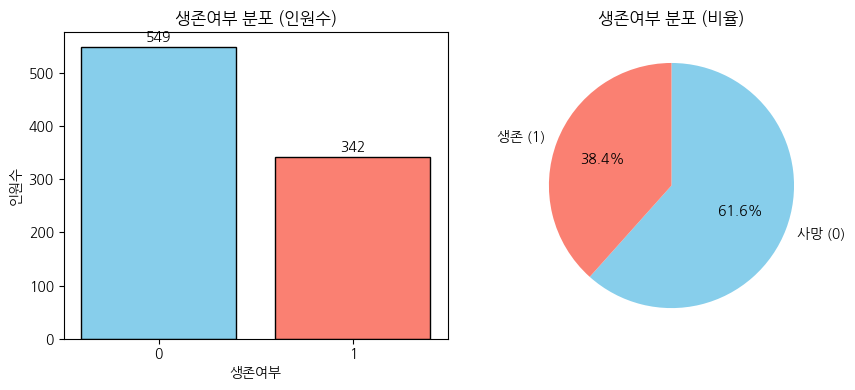

In [60]:
import matplotlib.pyplot as plt

print("[타깃 분포 시각화]")

# 생존여부 수와 비율
counts = df_kor["생존여부"].value_counts().sort_index()
ratios = df_kor["생존여부"].value_counts(normalize=True).sort_index()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# 막대그래프 (생존/사망 인원 수)
colors = ["skyblue", "salmon"]
bars = axes[0].bar(counts.index.astype(str), counts.values, color=colors, edgecolor="black")
axes[0].set_title("생존여부 분포 (인원수)")
axes[0].set_xlabel("생존여부")
axes[0].set_ylabel("인원수")

# 막대 위에 수 표시
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, height + 5, str(height),
                 ha="center", va="bottom", fontsize=10, fontweight="bold")

# 파이차트 (생존/사망 비율)
axes[1].pie(
    ratios.values,
    labels=["사망 (0)", "생존 (1)"],
    autopct="%.1f%%",
    colors=colors,
    startangle=90,
    counterclock=False
)
axes[1].set_title("생존여부 분포 (비율)")

plt.tight_layout()
plt.show()

---

#### 3-2. 범주형 컬럼 분포

In [63]:
print("[범주형 분포 분석]")

# 분석할 범주형 컬럼 목록 (df_kor에 존재하면서 분석이 필요한 컬럼만)
cat_cols = [c for c in ["객실등급", "성별", "승선항구"] if c in df_kor.columns]

for c in cat_cols:
    print(f"\n=== {c} 분포 ===")

    # 각 카테고리 개수 세기
    print("[인원수]")
    print(df_kor[c].value_counts(dropna=False))

    # 각 카테고리 비율 계산
    print("\n[비율]")
    print(df_kor[c].value_counts(normalize=True, dropna=False).round(3))


[범주형 분포 분석]

=== 객실등급 분포 ===
[인원수]
객실등급
3    491
1    216
2    184
Name: count, dtype: int64

[비율]
객실등급
3    0.551
1    0.242
2    0.207
Name: proportion, dtype: float64

=== 성별 분포 ===
[인원수]
성별
male      577
female    314
Name: count, dtype: int64

[비율]
성별
male      0.648
female    0.352
Name: proportion, dtype: float64

=== 승선항구 분포 ===
[인원수]
승선항구
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

[비율]
승선항구
S      0.723
C      0.189
Q      0.086
NaN    0.002
Name: proportion, dtype: float64


[범주형 분포 시각화]

=== 객실등급 분포 시각화 ===


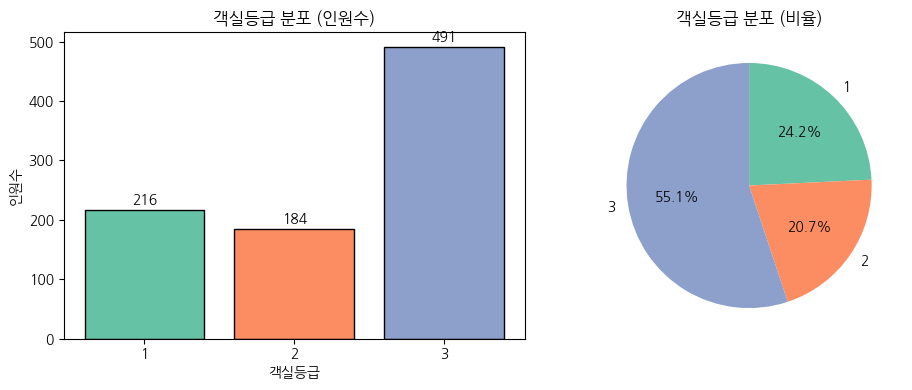


=== 성별 분포 시각화 ===


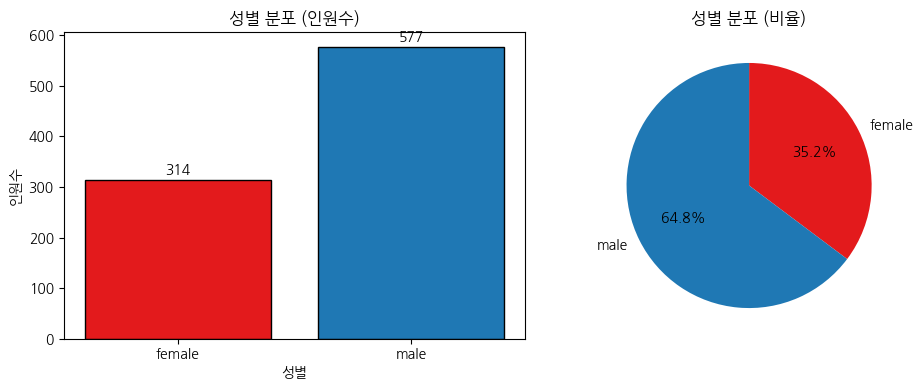


=== 승선항구 분포 시각화 ===


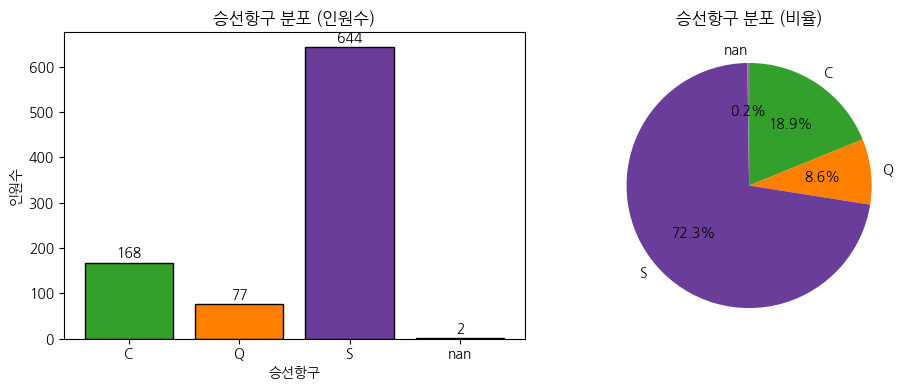

In [64]:
import matplotlib.pyplot as plt
import numpy as np

print("[범주형 분포 시각화]")

# 분석할 범주형 컬럼 목록
cat_cols = [c for c in ["객실등급", "성별", "승선항구"] if c in df_kor.columns]

# 컬럼별 색상 매핑 사전
color_maps = {
    "객실등급": {1: "#66c2a5", 2: "#fc8d62", 3: "#8da0cb"},
    "성별": {"male": "#1f78b4", "female": "#e31a1c", "남성": "#1f78b4", "여성": "#e31a1c"},
    "승선항구": {"C": "#33a02c", "Q": "#ff7f00", "S": "#6a3d9a", np.nan: "gray"}
}

for c in cat_cols:
    print(f"\n=== {c} 분포 시각화 ===")
    
    counts = df_kor[c].value_counts(dropna=False).sort_index()
    ratios = df_kor[c].value_counts(normalize=True, dropna=False).sort_index()

    # 색상 매핑 (counts 인덱스 순서에 맞춰 색상 리스트 생성)
    colors = [color_maps[c][val] for val in counts.index]

    # subplot 생성 (1행 2열)
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # --- (1) 막대그래프 (인원수) ---
    bars = axes[0].bar(counts.index.astype(str), counts.values,
                       color=colors, edgecolor="black")
    axes[0].set_title(f"{c} 분포 (인원수)")
    axes[0].set_xlabel(c)
    axes[0].set_ylabel("인원수")

    # 막대 위에 숫자 표시
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2, height + 5, str(height),
                     ha="center", va="bottom", fontsize=10, fontweight="bold")

    # --- (2) 파이차트 (비율) ---
    axes[1].pie(
        ratios.values,
        labels=ratios.index.astype(str),
        autopct="%.1f%%",
        colors=colors,              # 막대그래프와 동일 색상
        startangle=90,
        counterclock=False
    )
    axes[1].set_title(f"{c} 분포 (비율)")

    plt.tight_layout()
    plt.show()

---

#### 3-3. 수치형 컬럼 분포

In [66]:
import numpy as np
from IPython.display import display

print("[수치형 분포 분석]")

# 수치형 컬럼 추출 (타깃과 ID 제외)
num_cols = df_kor.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ["생존여부", "승객ID"]  # ✅ 한글 컬럼명 기준
num_cols = [c for c in num_cols if c not in exclude_cols]

# 1) 결측치 개수와 비율
print("\n[결측치 요약]")
missing = (
    df_kor[num_cols].isna()
      .sum()
      .rename("결측치 개수")
      .to_frame()
)
missing["결측치 비율(%)"] = (missing["결측치 개수"] / len(df_kor) * 100).round(2)

# 결측치 많은 순으로 정렬
missing = missing.sort_values(by="결측치 개수", ascending=False)

# 표 형태로 출력
display(missing)

# 2) 요약 통계
print("\n[수치형 요약 통계]")
display(df_kor[num_cols].describe().round(3))


[수치형 분포 분석]

[결측치 요약]


,결측치 개수,결측치 비율(%)
나이,177,19.87
객실등급,0,0.00
형제/배우자수,0,0.00
부모/자녀수,0,0.00
요금,0,0.00



[수치형 요약 통계]


,객실등급,나이,형제/배우자수,부모/자녀수,요금
count,891.000,714.000,891.000,891.000,891.000
mean,2.309,29.699,0.523,0.382,32.204
std,0.836,14.526,1.103,0.806,49.693
min,1.000,0.420,0.000,0.000,0.000
25%,2.000,20.125,0.000,0.000,7.910
50%,3.000,28.000,0.000,0.000,14.454
75%,3.000,38.000,1.000,0.000,31.000
max,3.000,80.000,8.000,6.000,512.329


[수치형 변수 분포 - 막대그래프 vs 트리맵 + KDE]


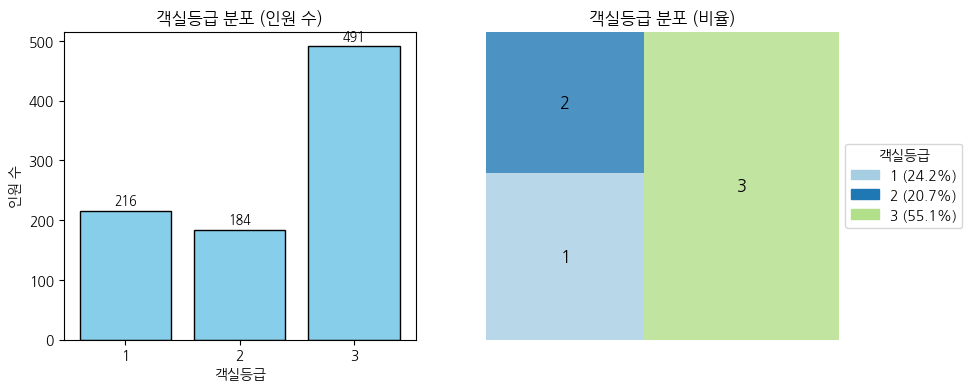

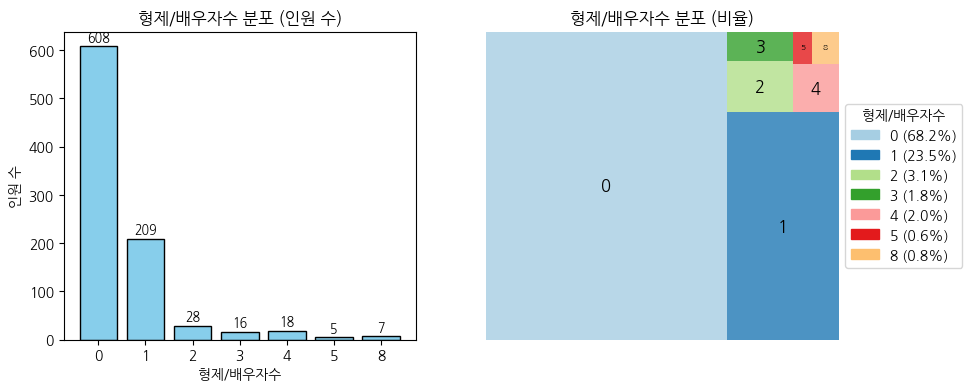

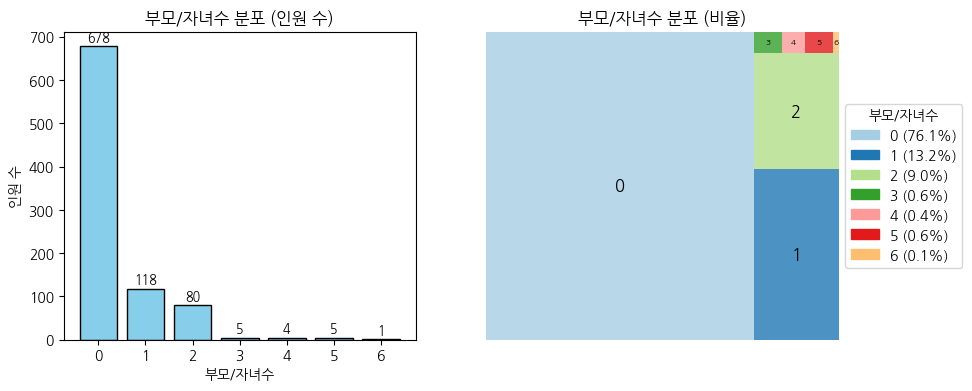

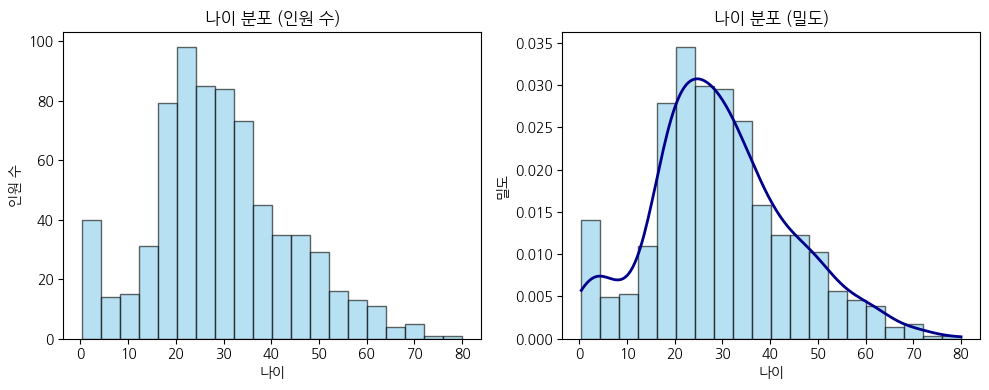

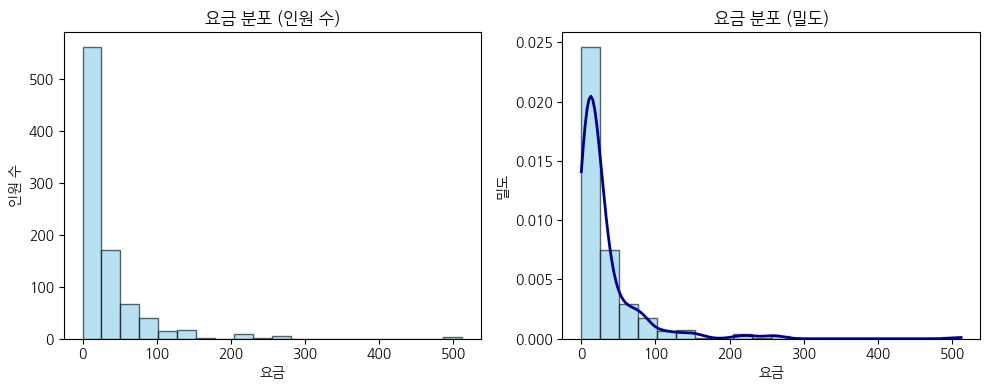

In [69]:
import matplotlib.pyplot as plt
import squarify
import numpy as np
from scipy.stats import gaussian_kde

print("[수치형 변수 분포 - 막대그래프 vs 트리맵 + KDE]")

# 수치형 컬럼 추출 (타깃과 ID 제외)
num_cols = df_kor.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ["생존여부", "승객ID"]  # ✅ 한글 컬럼명 기준
num_cols = [c for c in num_cols if c not in exclude_cols]

# 연속형 / 이산형 변수 구분
continuous_cols = ["나이", "요금"]  # 연속형
discrete_cols = [c for c in num_cols if c not in continuous_cols]  # 이산형

# --- 이산형 변수 시각화 ---
for c in discrete_cols:
    counts = df_kor[c].value_counts(dropna=False).sort_index()
    ratios = df_kor[c].value_counts(normalize=True, dropna=False).sort_index()

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # (1) 막대그래프 (인원 수)
    bars = axes[0].bar(counts.index.astype(str), counts.values, color="skyblue", edgecolor="black")
    for i, v in enumerate(counts.values):
        axes[0].text(i, v + 5, str(v), ha="center", va="bottom", fontsize=9, fontweight="bold")
    axes[0].set_title(f"{c} 분포 (인원 수)")
    axes[0].set_xlabel(c)
    axes[0].set_ylabel("인원 수")

    # (2) 트리맵 (비율은 범례에만 표시, 그림에는 값만 표시)
    labels = [str(idx) for idx in ratios.index]   
    colors = plt.cm.Paired.colors[:len(ratios)]

    squarify.plot(
        sizes=ratios.values,
        label=labels,
        color=colors,
        alpha=0.8,
        ax=axes[1],
        text_kwargs={'fontsize': 12, 'weight': 'bold'}
    )

    # 작은 값은 글씨 축소
    for t, val in zip(axes[1].texts, ratios.values):
        if val < 0.01:
            t.set_fontsize(6)
            t.set_color("black")

    axes[1].set_title(f"{c} 분포 (비율)")
    axes[1].axis("off")

    # 범례 (값 + 비율%)
    legend_labels = [f"{idx} ({val:.1%})" for idx, val in zip(ratios.index, ratios.values)]

    axes[1].legend(
        handles=[plt.Rectangle((0,0),1,1, color=col) for col in colors],
        labels=legend_labels,
        title=c,
        loc="center left",
        bbox_to_anchor=(1, 0.5)
    )


# --- 연속형 변수 시각화 ---
for c in continuous_cols:
    data = df_kor[c].dropna()

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # (1) 히스토그램 (인원 수)
    axes[0].hist(data, bins=20, color="skyblue", edgecolor="black", alpha=0.6)
    axes[0].set_title(f"{c} 분포 (인원 수)")
    axes[0].set_xlabel(c)
    axes[0].set_ylabel("인원 수")

    # (2) 히스토그램 (밀도 + KDE 추세선)
    axes[1].hist(data, bins=20, density=True, color="skyblue", edgecolor="black", alpha=0.6)
    kde = gaussian_kde(data)
    x_vals = np.linspace(data.min(), data.max(), 200)
    axes[1].plot(x_vals, kde(x_vals), color="darkblue", linewidth=2)
    axes[1].set_title(f"{c} 분포 (밀도)")
    axes[1].set_xlabel(c)
    axes[1].set_ylabel("밀도")

    plt.tight_layout()
    plt.show()


---

## 4. 심층 데이터 분석

#### 4-1 데이터 전처리

In [ ]:
# 원본 보존을 위해 복사본 생성

df_kor_prep = df_kor.copy()

#### 🧹 결측치 처리

Age : 중앙값 / 그룹별 평균으로 대체  
Embarked : 최빈값 대체
Cabin : 결측률이 높으므로 결측 여부만 이진 변수로 활용

In [ ]:
print("[결측치 처리]")

# Age: 중앙값으로 대체
if "Age" in df_kor_prep.columns:
    age_median = df_kor_prep["Age"].median()
    df_kor_prep["Age"] = df_kor_prep["Age"].fillna(age_median)
    print(f"- Age 결측치 {age_median} (중앙값)으로 대체")

# Embarked: 최빈값으로 대체
if "Embarked" in df_kor_prep.columns:
    embarked_mode = df_kor_prep["Embarked"].mode()[0]
    df_kor_prep["Embarked"] = df_kor_prep["Embarked"].fillna(embarked_mode)
    print(f"- Embarked 결측치 '{embarked_mode}' (최빈값)으로 대체")

# Cabin: "Missing"으로 대체
if "Cabin" in df_kor_prep.columns:
    df_kor_prep["Cabin"] = df_kor_prep["Cabin"].fillna("Missing")
    print("- Cabin 결측치는 'Missing'으로 대체")

print("\n[결측치 처리 후 요약]")
print(df_kor_prep.isnull().sum())

[결측치 처리]
- Age 결측치 28.0 (중앙값)으로 대체
- Embarked 결측치 'S' (최빈값)으로 대체
- Cabin 결측치는 'Missing'으로 대체

[결측치 처리 후 요약]
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


#### ⚠️ 이상치 처리

Fare : 최대 512.3과 같은 고가 요금으로 인해 분포가 왜곡됨 → 데이터분에서는 구간화(binning)로 분포를 안정화하고, 머신러닝 모델링 시에는 로그 변환으로 이상치 영향을 완화함

Age : 대부분 0세~80세 사이에 분포하며, 특별한 극단값은 없음 → 이상치 처리는 필요하지 않으며, 대신 결측치 보완(중앙값/그룹별 평균)과 연령대 구간화(Child, Adult, Senior 등)로 활용하는 경우가 많음

SibSp, Parch : 값이 한쪽으로 치우쳐 있으나 이는 데이터 특성(가족 규모가 작은 승객이 대부분)을 반영하는 것일 뿐 이상치로 보긴 어려움 → 보통 두 변수를 합쳐 FamilySize 같은 파생 변수를 만들어 분석에 활용함

In [ ]:
print("[이상치 처리 - Fare 해석 중심 구간화]")

if "Fare" in df_kor_prep.columns:
    # 구간 정의
    bins = [0, 10, 50, 100, df_kor_prep["Fare"].max()]
    labels = ["L", "M", "H", "VH"]
    
    # 구간화 적용
    df_kor_prep["Fare_bin"] = pd.cut(df_kor_prep["Fare"], bins=bins, labels=labels, include_lowest=True)
    
    # 구간별 요약 출력 (observed=True 추가)
    bin_summary = df_kor_prep.groupby("Fare_bin", observed=True)["Fare"].agg(["min", "max", "count"])
    print(bin_summary)


[이상치 처리 - Fare 해석 중심 구간화]
               min       max  count
Fare_bin                           
L           0.0000    9.8458    336
M          10.1708   50.0000    395
H          50.4958   93.5000    107
VH        106.4250  512.3292     53


#### 🧩 파생 변수 생성

FamilySize : SibSp(형제/배우자 수)와 Parch(부모/자녀 수)를 합산하고 본인을 포함하여 계산 → FamilySize = SibSp + Parch + 1. 가족 규모가 생존율에 영향을 줄 수 있어 자주 활용됨

IsAlone : FamilySize가 1인 경우 혼자인 승객 여부를 나타내는 변수. 독립적으로 생존율과 밀접한 연관이 있어 분석에 유용함

Title : Name 변수에서 추출한 호칭(Mr, Mrs, Miss, Master 등). 승객의 성별, 나이, 사회적 지위를 반영하여 생존율과의 관계를 설명하는 데 효과적임

Age_bin : Age를 연령대 구간(Child, Teen, YoungAdult, Adult, Senior)으로 나눈 변수. 연령대별 생존율 차이를 확인하는 데 유용하게 활용됨

In [ ]:
print("[파생 변수 생성]")

# FamilySize = SibSp + Parch + 1
if "SibSp" in df_kor_prep.columns and "Parch" in df_kor_prep.columns:
    df_kor_prep["FamilySize"] = df_kor_prep["SibSp"] + df_kor_prep["Parch"] + 1
    print("- FamilySize 변수 생성 (SibSp + Parch + 1)")

# IsAlone = (FamilySize == 1)
if "FamilySize" in df_kor_prep.columns:
    df_kor_prep["IsAlone"] = (df_kor_prep["FamilySize"] == 1).astype(int)
    print("- IsAlone 변수 생성 (혼자 탑승 여부)")

# Title = Name에서 추출 (raw string 사용)
if "Name" in df_kor_prep.columns:
    df_kor_prep["Title"] = df_kor_prep["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)
    print("- Title 변수 생성 (Name에서 호칭 추출)")

# Age_bin = Age 구간화
if "Age" in df_kor_prep.columns:
    bins = [0, 12, 18, 30, 50, 80]
    labels = ["Child", "Teen", "YoungAdult", "Adult", "Senior"]
    df_kor_prep["Age_bin"] = pd.cut(df_kor_prep["Age"], bins=bins, labels=labels, include_lowest=True)
    print("- Age_bin 변수 생성 (연령대 구간화)")


[파생 변수 생성]
- FamilySize 변수 생성 (SibSp + Parch + 1)
- IsAlone 변수 생성 (혼자 탑승 여부)
- Title 변수 생성 (Name에서 호칭 추출)
- Age_bin 변수 생성 (연령대 구간화)


#### 🔠 범주형 변수 정리

범주형 변수 변환 : Sex, Embarked, Title, Pclass, Fare_bin, Cabin 컬럼을 범주형(category) 자료형으로 변환하여 분석 및 모델링 시 적절히 처리될 수 있도록 정리함

Title 정리 : Name에서 추출한 호칭(Title) 중 Dr, Col, Rev 등 희소하게 등장하는 값들은 "Other" 그룹으로 묶어 범주의 수를 줄이고 분석 효율성을 높임

Cabin 처리 : Cabin 번호 전체를 사용하지 않고, 첫 글자(A, B, C 등)만 추출하여 구역 정보를 반영. 결측치는 "M"(Missing)으로 대체하여 객실 정보 유무와 구역 특성을 동시에 활용함

In [ ]:
print("[범주형 변수 정리]")

# 1) Title 정리 (희소 카테고리를 Other로 묶기)
if "Title" in df_kor_prep.columns:
    main_titles = ["Mr", "Mrs", "Miss", "Master"]
    df_kor_prep["Title"] = df_kor_prep["Title"].apply(lambda x: x if x in main_titles else "Other")
    print("- Title 변수 정리 (Mr, Mrs, Miss, Master만 유지, 나머지는 'Other'로 묶음)")

# 2) Cabin 처리 (첫 글자 추출, 결측치는 'M')
if "Cabin" in df_kor_prep.columns:
    df_kor_prep["Cabin"] = df_kor_prep["Cabin"].astype(str).str[0]
    df_kor_prep["Cabin"] = df_kor_prep["Cabin"].replace("n", "M")  # 'nan' 처리 시 앞글자 'n'으로 잡히므로 'M'으로 변환
    print("- Cabin 변수 정리 (첫 글자 추출, 결측치는 'M')")

# 3) 범주형 변수 변환
categorical_cols = ["Sex", "Embarked", "Title", "Pclass", "Fare_bin", "Cabin", "Age_bin"]
for col in categorical_cols:
    if col in df_kor_prep.columns:
        df_kor_prep[col] = df_kor_prep[col].astype("category")
print(f"- 범주형 변수 변환 완료: {categorical_cols}")

[범주형 변수 정리]
- Title 변수 정리 (Mr, Mrs, Miss, Master만 유지, 나머지는 'Other'로 묶음)
- Cabin 변수 정리 (첫 글자 추출, 결측치는 'M')
- 범주형 변수 변환 완료: ['Sex', 'Embarked', 'Title', 'Pclass', 'Fare_bin', 'Cabin', 'Age_bin']


#### 📔 전처리 완료 데이터프레임

In [ ]:
df_kor_prep.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_bin,FamilySize,IsAlone,Title,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,L,2,0,Mr,YoungAdult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,H,2,0,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,L,1,1,Miss,YoungAdult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,H,2,0,Mrs,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,L,1,1,Mr,Adult


---

#### 4-2.  변수별 생존율 분석

In [ ]:
import pandas as pd
from IPython.display import display

print("[변수별 생존율 분석]")

analysis_cols = [
    "Sex", "Embarked", "Title", "Pclass", "Cabin",
    "FamilySize", "IsAlone", "Age_bin", "Fare_bin"
]

for col in analysis_cols:
    if col in df_kor_prep.columns:
        survival_rate = (
            df_kor_prep.groupby(col, observed=True)["Survived"]
            .mean()
            .reset_index()
            .rename(columns={"Survived": "SurvivalRate"})
            .sort_values("SurvivalRate", ascending=False)   # 생존율 높은 순
            .reset_index(drop=True)                         # 인덱스 삭제
        )
        print(f"\n▶ Survival Rate by {col}")
        display(survival_rate)

[변수별 생존율 분석]

▶ Survival Rate by Sex


,Sex,SurvivalRate
0,female,0.742038
1,male,0.188908



▶ Survival Rate by Embarked


,Embarked,SurvivalRate
0,C,0.553571
1,Q,0.389610
2,S,0.339009



▶ Survival Rate by Title


,Title,SurvivalRate
0,Mrs,0.792000
1,Miss,0.697802
2,Master,0.575000
3,Other,0.444444
4,Mr,0.156673



▶ Survival Rate by Pclass


,Pclass,SurvivalRate
0,1,0.629630
1,2,0.472826
2,3,0.242363



▶ Survival Rate by Cabin


,Cabin,SurvivalRate
0,D,0.757576
1,E,0.750000
2,B,0.744681
3,F,0.615385
4,C,0.593220
5,G,0.500000
6,A,0.466667
7,M,0.299854
8,T,0.000000



▶ Survival Rate by FamilySize


,FamilySize,SurvivalRate
0,4,0.724138
1,3,0.578431
2,2,0.552795
3,7,0.333333
4,1,0.303538
5,5,0.200000
6,6,0.136364
7,8,0.000000
8,11,0.000000



▶ Survival Rate by IsAlone


,IsAlone,SurvivalRate
0,0,0.505650
1,1,0.303538



▶ Survival Rate by Age_bin


,Age_bin,SurvivalRate
0,Child,0.579710
1,Teen,0.428571
2,Adult,0.423237
3,Senior,0.343750
4,YoungAdult,0.331096



▶ Survival Rate by Fare_bin


,Fare_bin,SurvivalRate
0,VH,0.735849
1,H,0.654206
2,M,0.420253
3,L,0.199405


[변수별 생존율 시각화]


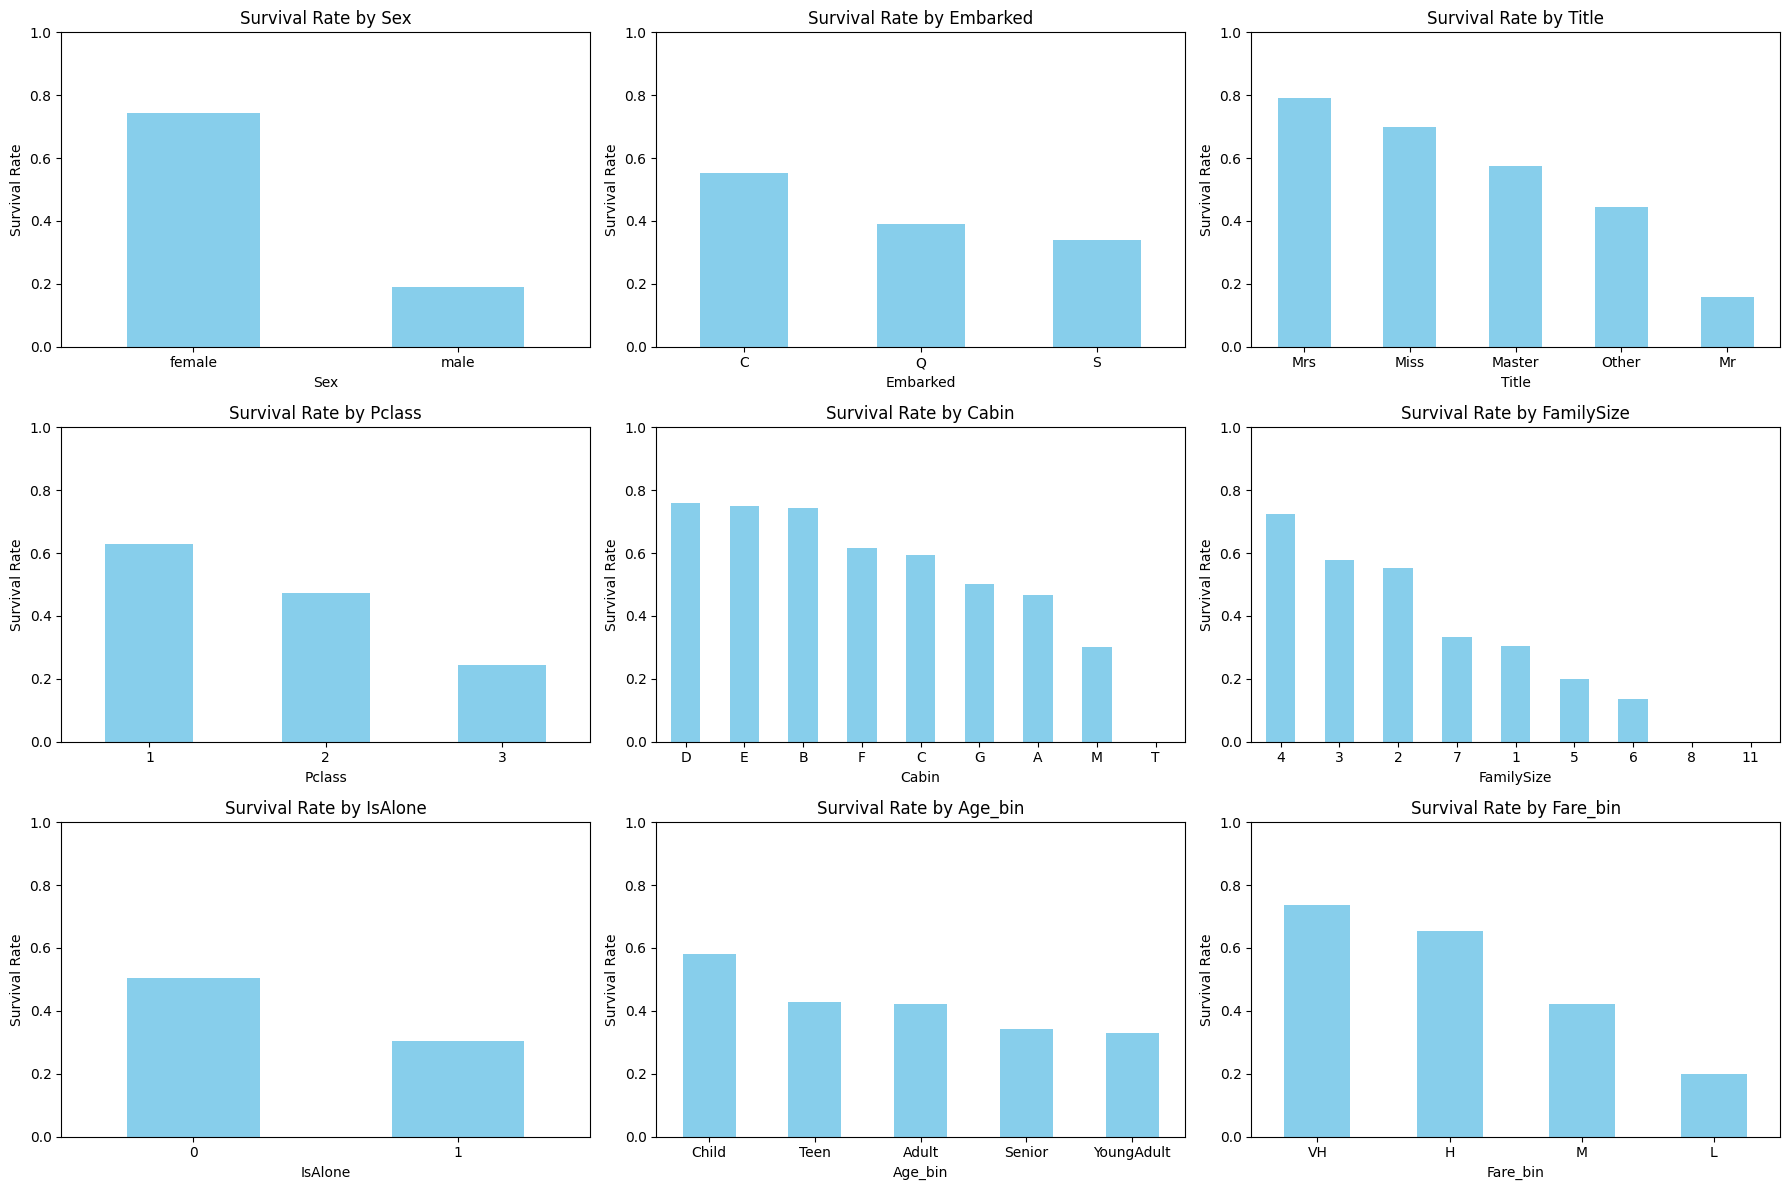

In [ ]:
import matplotlib.pyplot as plt

print("[변수별 생존율 시각화]")

# 분석 대상 변수
analysis_cols = [
    "Sex", "Embarked", "Title", "Pclass", "Cabin",
    "FamilySize", "IsAlone", "Age_bin", "Fare_bin"
]

# 3행 3열 서브플롯 (총 9개 변수 시각화)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(analysis_cols):
    if col in df_kor_prep.columns:
        survival_rate = (
            df_kor_prep.groupby(col, observed=True)["Survived"]
            .mean()
            .sort_values(ascending=False)   # 🔹 생존율 높은 순으로 정렬
        )
        survival_rate.plot(kind="bar", ax=axes[i], rot=0, color="skyblue")
        axes[i].set_title(f"Survival Rate by {col}")
        axes[i].set_ylabel("Survival Rate")
        axes[i].set_ylim(0, 1)  # 비율이므로 0~1로 고정

plt.tight_layout()
plt.show()

[교차분석 - Sex × Pclass]
전체 평균 생존율: 0.384

[절대 생존율]
Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

[상대적 생존율] (전체 평균=1.0 기준)
Pclass         1         2         3
Sex                                 
female  2.522116  2.399584  1.302632
male    0.960958  0.410088  0.352874


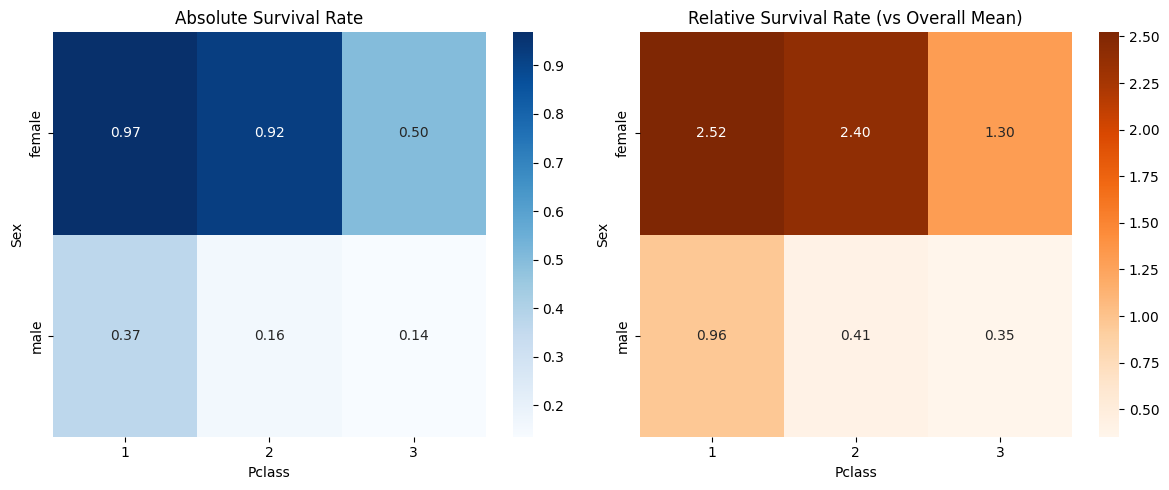

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

print("[교차분석 - Sex × Pclass]")

# 전체 평균 생존율
overall_survival = df_kor_prep["Survived"].mean()
print(f"전체 평균 생존율: {overall_survival:.3f}")

# 절대 생존율 교차표
cross_table = df_kor_prep.pivot_table(
    index="Sex", 
    columns="Pclass", 
    values="Survived", 
    aggfunc="mean",
    observed=True
)

# 상대적 생존율 교차표
relative_table = cross_table / overall_survival

print("\n[절대 생존율]")
print(cross_table)

print("\n[상대적 생존율] (전체 평균=1.0 기준)")
print(relative_table)

# 플롯 2개 나란히 배치
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 절대 생존율 Heatmap
sns.heatmap(cross_table, annot=True, fmt=".2f", cmap="Blues", ax=axes[0])
axes[0].set_title("Absolute Survival Rate")
axes[0].set_ylabel("Sex")
axes[0].set_xlabel("Pclass")

# 상대적 생존율 Heatmap
sns.heatmap(relative_table, annot=True, fmt=".2f", cmap="Oranges", ax=axes[1])
axes[1].set_title("Relative Survival Rate (vs Overall Mean)")
axes[1].set_ylabel("Sex")
axes[1].set_xlabel("Pclass")

plt.tight_layout()
plt.show()


[교차분석 - Age_bin × Sex]
전체 평균 생존율: 0.384

[절대 생존율]
Sex           female      male
Age_bin                       
Child       0.593750  0.567568
Teen        0.750000  0.088235
YoungAdult  0.727273  0.144737
Adult       0.779070  0.225806
Senior      0.941176  0.127660

[상대적 생존율] (전체 평균=1.0 기준)
Sex           female      male
Age_bin                       
Child       1.546875  1.478663
Teen        1.953947  0.229876
YoungAdult  1.894737  0.377078
Adult       2.029682  0.588285
Senior      2.452012  0.332587


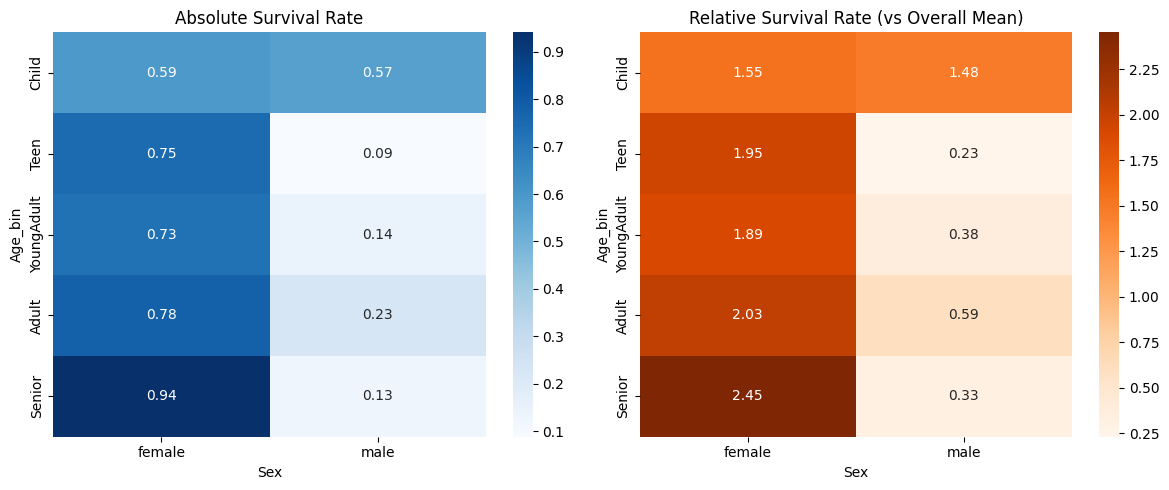

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print("[교차분석 - Age_bin × Sex]")

# 전체 평균 생존율
overall_survival = df_kor_prep["Survived"].mean()
print(f"전체 평균 생존율: {overall_survival:.3f}")

# 절대 생존율 교차표
cross_table = df_kor_prep.pivot_table(
    index="Age_bin", 
    columns="Sex", 
    values="Survived", 
    aggfunc="mean",
    observed=True  
)

# 상대적 생존율 교차표
relative_table = cross_table / overall_survival

print("\n[절대 생존율]")
print(cross_table)

print("\n[상대적 생존율] (전체 평균=1.0 기준)")
print(relative_table)

# 플롯 2개 가로로 나란히
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 절대 생존율 Heatmap
sns.heatmap(cross_table, annot=True, fmt=".2f", cmap="Blues", ax=axes[0])
axes[0].set_title("Absolute Survival Rate")
axes[0].set_ylabel("Age_bin")
axes[0].set_xlabel("Sex")

# 상대적 생존율 Heatmap
sns.heatmap(relative_table, annot=True, fmt=".2f", cmap="Oranges", ax=axes[1])
axes[1].set_title("Relative Survival Rate (vs Overall Mean)")
axes[1].set_ylabel("Age_bin")
axes[1].set_xlabel("Sex")

plt.tight_layout()
plt.show()


[교차분석 - FamilySize × Pclass]
전체 평균 생존율: 0.384

[절대 생존율]
Pclass             1         2         3
FamilySize                              
1           0.532110  0.346154  0.212963
2           0.728571  0.529412  0.350877
3           0.750000  0.677419  0.425532
4           0.714286  0.769231  0.666667
5           1.000000  1.000000  0.000000
6           0.500000  1.000000  0.000000
7                NaN       NaN  0.333333
8                NaN       NaN  0.000000
11               NaN       NaN  0.000000

[상대적 생존율] (전체 평균=1.0 기준)
Pclass             1         2         3
FamilySize                              
1           1.386287  0.901822  0.554825
2           1.898120  1.379257  0.914127
3           1.953947  1.764856  1.108623
4           1.860902  2.004049  1.736842
5           2.605263  2.605263  0.000000
6           1.302632  2.605263  0.000000
7                NaN       NaN  0.868421
8                NaN       NaN  0.000000
11               NaN       NaN  0.000000


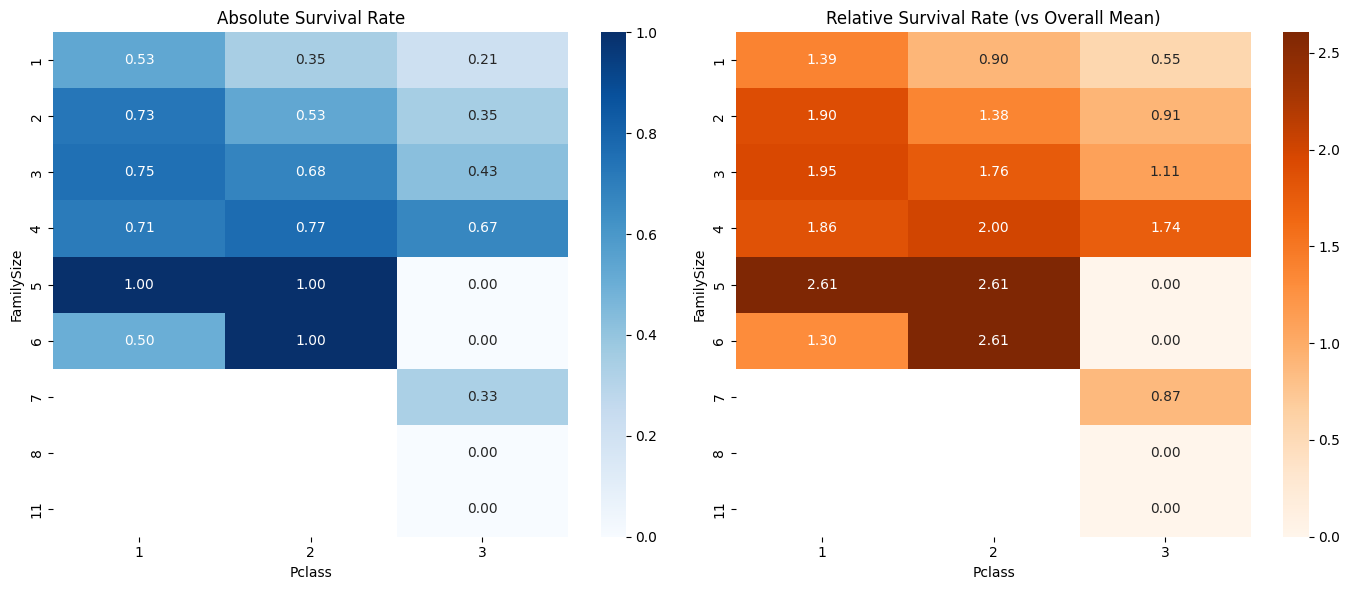

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print("[교차분석 - FamilySize × Pclass]")

# 전체 평균 생존율
overall_survival = df_kor_prep["Survived"].mean()
print(f"전체 평균 생존율: {overall_survival:.3f}")

# 절대 생존율 교차표
cross_table = df_kor_prep.pivot_table(
    index="FamilySize", 
    columns="Pclass", 
    values="Survived", 
    aggfunc="mean",
    observed=True  
)

# 상대적 생존율 교차표
relative_table = cross_table / overall_survival

print("\n[절대 생존율]")
print(cross_table)

print("\n[상대적 생존율] (전체 평균=1.0 기준)")
print(relative_table)

# 플롯 2개 가로 배치
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 절대 생존율 Heatmap
sns.heatmap(cross_table, annot=True, fmt=".2f", cmap="Blues", ax=axes[0])
axes[0].set_title("Absolute Survival Rate")
axes[0].set_ylabel("FamilySize")
axes[0].set_xlabel("Pclass")

# 상대적 생존율 Heatmap
sns.heatmap(relative_table, annot=True, fmt=".2f", cmap="Oranges", ax=axes[1])
axes[1].set_title("Relative Survival Rate (vs Overall Mean)")
axes[1].set_ylabel("FamilySize")
axes[1].set_xlabel("Pclass")

plt.tight_layout()
plt.show()

[다변량 분석 - Pclass + Sex + Age_bin]
Age_bin           Child      Teen  YoungAdult     Adult    Senior
Pclass Sex                                                       
1      female  0.000000  1.000000    0.969697  0.972973  1.000000
       male    1.000000  0.500000    0.333333  0.448980  0.192308
2      female  1.000000  1.000000    0.906250  0.925926  0.666667
       male    1.000000  0.000000    0.065217  0.114286  0.083333
3      female  0.478261  0.550000    0.551282  0.272727  1.000000
       male    0.360000  0.076923    0.125000  0.126761  0.000000


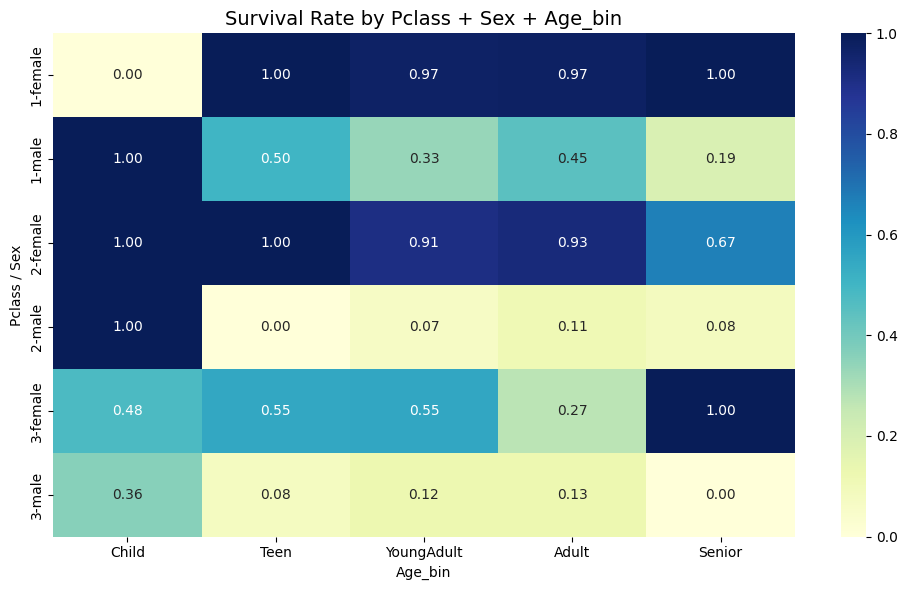

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("[다변량 분석 - Pclass + Sex + Age_bin]")

# 피벗테이블 생성 (3변수 조합별 평균 생존율)
pivot_table = pd.pivot_table(
    df_kor_prep,
    values="Survived",
    index=["Pclass", "Sex"],   # 행 : Pclass, Sex
    columns="Age_bin",         # 열 : 연령대
    aggfunc="mean",
    observed=True
)

print(pivot_table)

# 시각화 (Heatmap)
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Survival Rate by Pclass + Sex + Age_bin", fontsize=14)
plt.ylabel("Pclass / Sex")
plt.xlabel("Age_bin")
plt.tight_layout()
plt.show()


[다변량 분석 - Pclass + Sex + Age_bin]

▶ Pivot Table (생존율)


Age_bin           Child      Teen  YoungAdult     Adult    Senior
Pclass Sex                                                       
1      female  0.000000  1.000000    0.969697  0.972973  1.000000
       male    1.000000  0.500000    0.333333  0.448980  0.192308
2      female  1.000000  1.000000    0.906250  0.925926  0.666667
       male    1.000000  0.000000    0.065217  0.114286  0.083333
3      female  0.478261  0.550000    0.551282  0.272727  1.000000
       male    0.360000  0.076923    0.125000  0.126761  0.000000

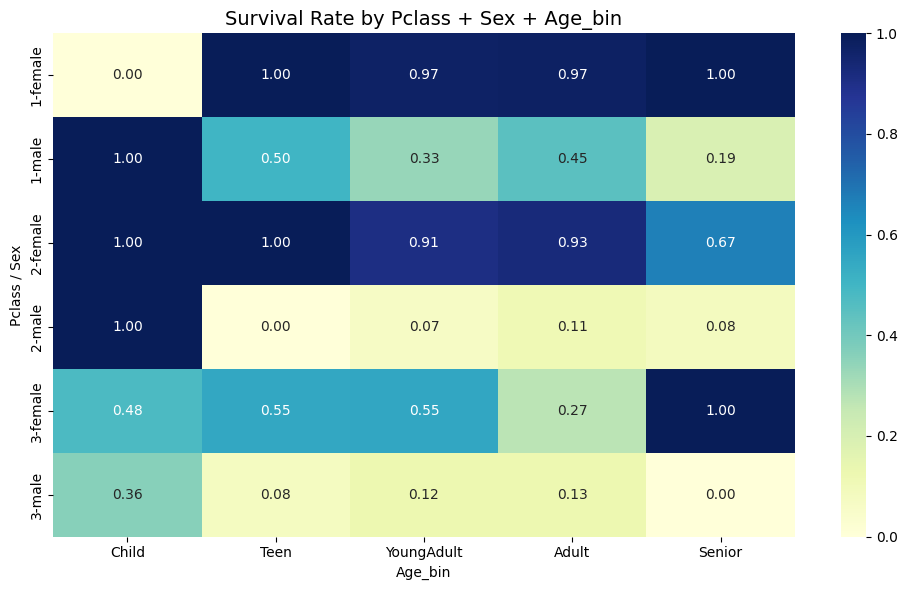

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

print("[다변량 분석 - Pclass + Sex + Age_bin]")

# 피벗테이블 생성
pivot_table = pd.pivot_table(
    df_kor_prep,
    values="Survived",
    index=["Pclass", "Sex"],   # 행 : Pclass + Sex
    columns="Age_bin",         # 열 : Age_bin
    aggfunc="mean",
    observed=True
)

# 피벗테이블 출력
print("\n▶ Pivot Table (생존율)")
display(pivot_table)

# Heatmap 시각화
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Survival Rate by Pclass + Sex + Age_bin", fontsize=14)
plt.ylabel("Pclass / Sex")
plt.xlabel("Age_bin")
plt.tight_layout()
plt.show()
